<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSER LES VENTES D'UNE LIBRAIRIE</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

La société LAPAGE librairie physique, a ouvert depuis 2 ans un site de vente en ligne.<br> <br>

L'analyse des données du site doivent permettre de :

+ décider de la création de nouvelles offres (jeunness, thématiques de lecture, type d'ouvrage BD , roman).
+ d'adapter certains prix.
+ de cibler un type de clientelle.
<br>


L'analyse sera découpée en deux parties : analyse des différents indicateurs de vente ET analyse cibles sur les clients.
<br><br>

---

PARTIE 1 : Indicateurs de ventes<br>
+ CA avec moyenne mobile (jour, mois semaine)
+ CA par catégorie
+ Nombre de clients par mois
+ Nombre de transactions
+ Nombre de produits vendus
+ zoom sur les TOPs, les FLOPS
+ Répartition par catégorie
+ Infos sur le profil client : répartition du CA pour les clients B2B, courbe de Lorenz
+ autre infos pertimentes
<br><br>

PARTIE 2 : Etude de corrélations<br>
+ le lien entre le genre d’un client et les catégories des livres
achetés,
+ le lien entre l'âge des clients et le montant total des achats,
+ le lien entre l'âge des clients (tranche d'âge) et la fréquence d’achat,
+ le lien entre l'âge des clients et la taille du panier moyen,
+ le lien entre l'âge des clients et la catégorie des
livres achetés.
<br>

Pour chaque corrélation, réalisation d'un test statistique.


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">--- PARTIE 1  ---</h1>
</div>


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>
<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
#Importation de la librairie Pandas
import pandas as pd

In [ ]:
#Importation de la librairie plotly express
import plotly.express as px

#Importation de la librairie plotly express
import plotly

In [ ]:
#Importation de la librairie numpy
import numpy as np

In [ ]:
#Importation de la datetime
import datetime

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [ ]:
#Importation du fichier customers
customers = pd.read_csv("customers.csv", delimiter=';')

In [ ]:
#Importation du fichier products
products = pd.read_csv("products.csv", delimiter=';')

In [ ]:
#Importation du fichier transactions
transactions = pd.read_csv("Transactions.csv", delimiter=';')

<ipython-input-121-7f21ea2bf6d4>:2: DtypeWarning:

Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier customer</h3>
</div>

In [ ]:
#Consulter le nombre de colonnes / La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [ ]:
#Afficher les 5 premières lignes de la table
customers.head()


client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne client_id

if customers["client_id"].drop_duplicates().size == customers.shape[0] :
  print ('Il n\'y a pas de de clients en double')
else:
  print ('Il y a {} clients en double'.format(customers["client_id"].drop_duplicates().size - customers.shape[0]))



Il n'y a pas de de clients en double


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier products</h3>
</div>

In [ ]:
#Consulter le nombre de colonnes / La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [ ]:
#Afficher les 5 premières lignes de la table
products.head()


id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne id_prod

if products["id_prod"].drop_duplicates().size == products.shape[0] :
  print ('Il n\'y a pas de d\'articles en double')
else:
  print ('Il y a {} articles en double'.format(products["id_prod"].drop_duplicates().size - products.shape[0]))



Il n'y a pas de d'articles en double


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier transactions</h3>
</div>

In [ ]:
#Consulter le nombre de colonnes / La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [ ]:
#Afficher les 5 premières lignes de la table
transactions.head()


id_prod                        date session_id client_id
0  0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1  0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2  0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3  0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4  0_1358  2021-03-01 00:05:18.801198        s_5    c_2033

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Préparation des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Ajout de colonnes : age, tanche d'age, jour, semaine, mois .... </h3>
</div>

In [ ]:
# Calcul de l'âge des clients
#----------------------------

annee_courante = datetime.datetime.now().year
annee_courante_int = int(annee_courante)

customers['age'] = annee_courante_int - customers['birth']

In [ ]:
# Calcul de la tranche d'âge des clients
#---------------------------------------

transactions

def test_age(age):
    if age < 20:
        return 'Moins 20 ans'
    elif 20 <= age <= 30:
        return 'Entre 20 et 30 ans'
    elif 31 <= age <= 40:
        return 'Entre 31 et 40 ans'
    elif 41 <= age <= 50:
        return 'Entre 41 et 50 ans'
    elif 51 <= age <= 60:
        return 'Entre 51 et 60 ans'
    else:
        return 'Plus de 60 ans'

# création colonne tranche d'âge
customers['tranche_age'] = customers['age'].apply(test_age)

In [ ]:
# modification de type sur  la date de transaction
#-------------------------------------------------

# modification du type en passant un format de date
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# suppression des dates null
transactions = transactions.dropna(subset=['date'])

print("Nombre de transactions avec une date modifiée non renseignése {}".format(transactions['date'].isna().sum()))



Nombre de transactions avec une date modifiée non renseignése 0


In [ ]:
# ajout de année, mois, semaine, jour de la date de transaction
#-------------------------------------------------------------

# ajout de l'année
transactions['annee'] = transactions['date'].dt.year
transactions['annee'] = transactions['annee'].astype(str)

# ajout du mois
transactions['mois'] = transactions['date'].dt.month

# ajout du nom mois
transactions['mois_lib'] = transactions['date'].dt.month_name()

# ajout de la semaine
transactions['semaine'] = transactions['date'].dt.isocalendar().week

# ajout du jour
transactions['jour'] = transactions['date'].dt.day

# ajout du jour
transactions['jour_lib'] = transactions['date'].dt.day_name()



<ipython-input-133-8f40049ff9df>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - MERGE des données dans un seul dataframe </h3>
</div>

In [ ]:
# MERGE de transactions avec customers
#-------------------------------------------------------------

df_merge = pd.merge(transactions, customers, how="left", on="client_id", indicator=True)
ze_left_only = df_merge[df_merge['_merge'] == 'left_only']

print('')
print("Le dataframe df_merge contient {} ligne(s) en left_only".format(ze_left_only.shape[0]))
print('')



Le dataframe df_merge contient 0 ligne(s) en left_only



In [ ]:
# MERGE de df_merge avec products
#-------------------------------------------------------------

df_merge = pd.merge(df_merge, products, how="left", on="id_prod", indicator='_merge2')
ze_left_only = df_merge[df_merge['_merge2'] == 'left_only']

print('')
print("Le dataframe df_merge contient {} ligne(s) en left_only".format(ze_left_only.shape[0]))
print('')



Le dataframe df_merge contient 0 ligne(s) en left_only



In [ ]:
# Ajout d'une colonne libellé de catégorie
# pour plus de lisibilté dans les graphiques
#-----------------------------------------------------------
df_merge['lib_cat'] = df_merge['categ'].astype(str)
df_merge['lib_cat'] = 'Cat' + df_merge['lib_cat']




In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      687534 non-null  object        
 1   date         687534 non-null  datetime64[ns]
 2   session_id   687534 non-null  object        
 3   client_id    687534 non-null  object        
 4   annee        687534 non-null  object        
 5   mois         687534 non-null  int32         
 6   mois_lib     687534 non-null  object        
 7   semaine      687534 non-null  UInt32        
 8   jour         687534 non-null  int32         
 9   jour_lib     687534 non-null  object        
 10  sex          687534 non-null  object        
 11  birth        687534 non-null  int64         
 12  age          687534 non-null  int64         
 13  tranche_age  687534 non-null  object        
 14  _merge       687534 non-null  category      
 15  price        687534 non-null  floa

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse indicateurs de ventes</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Chiffre d'affaire avec Moyenne Mobile </h3>
</div>

In [ ]:
# Chiffre d'affaire 2021
#-------------------------------------------------------------

transac_2021 = df_merge[df_merge['annee'] == '2021']
transac_2021 = transac_2021.rename(columns={'price':'ca'})

# CA par semaine
ca_2021 = transac_2021.groupby(['annee','semaine'])['ca'].sum().reset_index()
ca_2021 = ca_2021.sort_values("semaine", ascending=True)

# moyenne mobile du CA
ca_2021['moymob'] = ca_2021['ca'].rolling(window=5).mean()


fig1 = px.line(ca_2021, x='semaine', y='ca', title="Chiffre d'affaire 2021")
fig1.add_scatter(x=ca_2021['semaine'], y=ca_2021['moymob'], mode='lines', name='Moyenne mobile')


In [ ]:
# Chiffre d'affaire 2022
#-------------------------------------------------------------

transac_2022 = df_merge[df_merge['annee'] == '2022']
transac_2022 = transac_2022.rename(columns={'price':'ca'})

# CA par semaine
ca_2022 = transac_2022.groupby(['annee','semaine'])['ca'].sum().reset_index()
ca_2022.sort_values("semaine", ascending=True, inplace=True)

# moyenne mobile du CA
ca_2022['moymob'] = ca_2022['ca'].rolling(window=5).mean()

#fig1 = px.bar(ca_2021, x='semaine', y='ca')
#fig1.add_scatter(x=ca_2021['semaine'], y=ca_2021['moymob'], mode='lines', name='Moyenne mobile')

fig1 = px.line(ca_2022, x='semaine', y='ca', title="Chiffre d'affaire 2022")
fig1.add_scatter(x=ca_2022['semaine'], y=ca_2022['moymob'], mode='lines', name='Moyenne mobile')



In [ ]:
# Chiffre d'affaire 2023
#-------------------------------------------------------------

transac_2023 = df_merge[df_merge['annee'] == '2023']
transac_2023 = transac_2023.rename(columns={'price':'ca'})

# CA par semaine
ca_2023 = transac_2023.groupby(['annee','semaine'])['ca'].sum().reset_index()
ca_2023.sort_values("semaine", ascending=True, inplace=True)

# moyenne mobile du CA
ca_2023['moymob'] = ca_2023['ca'].rolling(window=5).mean()

fig1 = px.line(ca_2023, x='semaine', y='ca', title="Chiffre d'affaire 2023")
fig1.add_scatter(x=ca_2023['semaine'], y=ca_2023['moymob'], mode='lines', name='Moyenne mobile')

In [ ]:
# Comparaison moyenne mobile 2021 -2022  (2023 n'est pas représentatif avec seulement 2 mois)
#--------------------------------------

df_combined = pd.concat([ca_2021, ca_2022])
figc = px.line(df_combined, x='semaine', y='moymob', color='annee', title='Comparaison moyenne mobile 2021 -2022')
figc.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Chiffre d'affaire par catégorie </h3>
</div>

In [ ]:
# ETUDE CA/catégorie 2021
#-------------------------------------------------------------

# évolution du CA sur l'année par catégorie
evol_2021 = transac_2021.groupby(['annee','categ', 'mois', 'mois_lib'])['ca'].sum().reset_index()


fig1 = px.line(evol_2021, x='mois_lib', y='ca', color='categ', title="Chiffre d'affaire par catégorie sur l'année 2021")
fig1.show()

In [ ]:
# ETUDE CA/catégorie 2022
#-------------------------------------------------------------

# évolution du CA sur l'année par catégorie
evol_2022 = transac_2022.groupby(['annee','categ', 'mois', 'mois_lib'])['ca'].sum().reset_index()


fig1 = px.line(evol_2022, x='mois_lib', y='ca', color='categ', title="Chiffre d'affaire par catégorie sur l'année 2022")
fig1.show()

In [ ]:
# ETUDE CA/catégorie 2023
#-------------------------------------------------------------

# évolution du CA sur l'année par catégorie
evol_2023 = transac_2023.groupby(['annee','categ', 'mois', 'mois_lib'])['ca'].sum().reset_index()


fig1 = px.line(evol_2023, x='mois_lib', y='ca', color='categ', title="Chiffre d'affaire par catégorie sur l'année 2023")
fig1.show()

In [ ]:
# Evolution de la répartition du CA par catégorie par année
dfe = df_merge.copy()
evol_repart = dfe.groupby(['annee','categ'])['price'].sum().reset_index()

fig1 = px.bar(evol_repart, x='categ', y='price', color='annee', barmode="group", title='Répartition du CA par catégorie et par année', text_auto=True)
fig1.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Nombre de clients par mois </h3>
</div>

In [ ]:
# Nombre de clients par mois par année
ncm = df_merge.copy()
ncma = ncm.groupby(['annee','mois','mois_lib'])['client_id'].nunique().reset_index()
ncma = ncma.sort_values("mois", ascending=True)

fig1 = px.line(ncma, x='mois_lib', y='client_id', color='annee', title='Nombre de clients par mois par année')
fig1.show()


In [ ]:
# Nombre de clients par mois
ncm = df_merge.copy()
ncma = ncm.groupby(['mois','mois_lib'])['client_id'].nunique().reset_index()
ncma = ncma.sort_values("mois", ascending=True)

fig1 = px.line(ncma, x='mois_lib', y='client_id', title='Nombre de clients par mois')
fig1.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Nombre de sessions par mois </h3>
</div>

In [ ]:
# Nombre de sessions par mois par année
ncm = df_merge.copy()
ncma = ncm.groupby(['annee','mois','mois_lib'])['session_id'].nunique().reset_index()
ncma = ncma.sort_values("mois", ascending=True)

fig1 = px.line(ncma, x='mois_lib', y='session_id', color='annee', title='Nombre de sessions/transactions par mois par année')
fig1.show()

In [ ]:
# Nombre de sessions par mois
ncm = df_merge.copy()
ncma = ncm.groupby(['mois','mois_lib'])['session_id'].nunique().reset_index()
ncma = ncma.sort_values("mois", ascending=True)

fig1 = px.line(ncma, x='mois_lib', y='session_id', title='Nombre de sessions/transactions par mois')
fig1.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - Nombre de produits vendus par mois </h3>
</div>

In [ ]:
# Nombre de produit par mois par année
ncm = df_merge.copy()
ncma = ncm.groupby(['annee','mois','mois_lib'])['id_prod'].count().reset_index()
ncma = ncma.sort_values("mois", ascending=True)

fig1 = px.line(ncma, x='mois_lib', y='id_prod', color='annee', title='Nombre de produits vendus par mois par année')
fig1.show()

In [ ]:
# Nombre de produits par mois
ncm = df_merge.copy()
ncma = ncm.groupby(['mois','mois_lib'])['id_prod'].count().reset_index()
ncma = ncma.sort_values("mois", ascending=True)

fig1 = px.line(ncma, x='mois_lib', y='id_prod', title='Nombre de produits vendus par mois')
fig1.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.5 - Répartition par catégorie </h3>
</div>

In [ ]:
# Répartition par catégorie
tmp1 = df_merge.copy()
tmp1['mois_num'] = tmp1['mois'].astype(str)
tmp1['an_mois'] = tmp1['annee'] + '-' + tmp1['mois_num']
grp = tmp1.groupby(['an_mois','lib_cat'])['price'].sum().reset_index()


fig1 = px.bar(grp, x='an_mois', y='price', color='lib_cat', title='Répartition du CA par catégorie')
fig1.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.6 - TOPs et FLOPs </h3>
</div>

In [ ]:
# TOP produit
#------------------------

top_prod = df_merge.groupby(['id_prod'])['price'].sum().reset_index()
top_prod = top_prod.sort_values("price", ascending=False)
top10_prod = top_prod.head(10)


figT10P = px.bar(top10_prod, x='id_prod', y='price', title='TOP 10 des produits par CA',  text_auto=True)
figT10P.update_layout(
    xaxis_title="Identifiant produit",
    yaxis_title="Chiffre d'affaire"
)
figT10P.show()

In [ ]:
# TOP client
#------------------------

top_client = df_merge.groupby(['client_id'])['price'].sum().reset_index()
top_client = top_client.sort_values("price", ascending=False)
top10_client = top_client.head(10)


figT10C = px.bar(top10_client, x='client_id', y='price', title='TOP 10 des clients par CA',  text_auto=True)
figT10C.update_layout(
    xaxis_title="Identifiant client",
    yaxis_title="Chiffre d'affaire"
)
figT10C.show()

In [ ]:
# FLOP produit
#------------------------

flop_prod = df_merge.groupby(['id_prod'])['price'].sum().reset_index()
flop_prod = flop_prod.sort_values("price", ascending=True)
flop10_prod = flop_prod.head(10)

figF10P = px.bar(flop10_prod, x='id_prod', y='price', title='FLOP 10 des produits par CA',  text_auto=True)
figF10P.update_layout(
    xaxis_title="Identifiant produit",
    yaxis_title="Chiffre d'affaire"
)
figF10P.show()

In [ ]:
# FLOP client
#------------------------

flop_client = df_merge.groupby(['client_id'])['price'].sum().reset_index()
flop_client = flop_client.sort_values("price", ascending=True)
flop10_client = flop_client.head(10)

figF10C = px.bar(flop10_client, x='client_id', y='price', title='FLOP 10 des clients par CA',  text_auto=True)
figF10C.update_layout(
    xaxis_title="Identifiant client",
    yaxis_title="Chiffre d'affaire"
)
figF10C.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.7 - Courbe de LORENZ panier moyen par client </h3>
</div>

In [ ]:
# Création d'un dataframe qui contient par montant de panier moyen  le nombre de clients
#=======================================================================================

# Etape 1 = on calcule le panier moyen par client
#------------------------------------------------
lorenzpmc = df_merge.groupby(['client_id'])['price'].mean().reset_index()
lorenzpmc = lorenzpmc.rename(columns={'price':'panier_moyen'})


# Etape 2 = on calcule le nombre client ayant le même montant de panier moyen
population = lorenzpmc.groupby(['panier_moyen'])['client_id'].count().reset_index()
population = population.sort_values("panier_moyen", ascending=True)


# Etape 3 = création du tableau statistique

# total de l'effectif_client
tec = population['client_id'].sum()
print("Vérification de l'effectif")
print('La somme des clients du dataframe popultion est de : {}, et le nombre de client unique dans le dataframe lorenzpmc est de {}'.format(tec, lorenzpmc['client_id'].nunique()))

tableau_stat = population.copy()
# on renome les colonnes
tableau_stat = tableau_stat.rename(columns={'panier_moyen':'xi'})
tableau_stat = tableau_stat.rename(columns={'client_id':'ni'})

# on ajoute des colonnes au tableau statistique
tableau_stat['nien%'] = (tableau_stat['ni'] / tec) * 100
print('Vérification de ni en pourcentage, le total de la colonne doit faire 100, et la valeur est : {} '.format(tableau_stat['nien%'].sum()))

tableau_stat['niXxi'] = tableau_stat['ni'] * tableau_stat['xi']

# total des paniers moyens
tpm = tableau_stat['niXxi'].sum()
print('Vérification du total des paniers moyens, la valeur est : {}'.format(tpm))

tableau_stat['niXxi%'] = tableau_stat['niXxi'] / tpm * 100
print('Vérification de niXxi en pourcentage, le total de la colonne doit faire 100, et la valeur est : {} '.format(tableau_stat['niXxi%'].sum()))

# Nombre de client en pourcentage cumulé croissant (axe X)
tableau_stat['nien%cumcroiss'] = tableau_stat['nien%'].cumsum()
# Panier moyen en pourcentage cumulé croissant (axe Y)
tableau_stat['niXxi%cumcroiss'] = tableau_stat['niXxi%'].cumsum()


# Etape 4 : Tracer la courbe de Lorenz
clorenz = px.line(tableau_stat, x='nien%cumcroiss', y='niXxi%cumcroiss', title='Courbe de Lorenz de la répartition du panier moyen par client')
clorenz.add_shape(
    type="line",
    x0=0, y0=0, x1=100, y1=100,
    line=dict(color="Gray", dash="dash")
)
clorenz.update_layout(
    height=650,  # Hauteur de la figure
    width=650,  # Largeur de la figure
    xaxis_title='Nombre de client en pourcentage cumulé croissant',
    yaxis_title='Panier moyen en pourcentage cumulé croissant')

clorenz.show()



Vérification de l'effectif
La somme des clients du dataframe popultion est de : 8600, et le nombre de client unique dans le dataframe lorenzpmc est de 8600
Vérification de ni en pourcentage, le total de la colonne doit faire 100, et la valeur est : 99.99999999999997 
Vérification du total des paniers moyens, la valeur est : 188579.45681023697
Vérification de niXxi en pourcentage, le total de la colonne doit faire 100, et la valeur est : 100.0 


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.8 - Coefficient de GINI
 </h3>
</div>

In [ ]:
import numpy as np

# Normaliser les cumulatifs
tableau_stat['proportion_cumul_montant'] = tableau_stat['niXxi%cumcroiss'] / tableau_stat['niXxi%cumcroiss'].max()
tableau_stat['proportion_cumul_clients'] = tableau_stat['nien%cumcroiss'] / tableau_stat['nien%cumcroiss'].max()

# Calculer l'aire sous la courbe de Lorenz
lorenz_area = np.trapz(tableau_stat['proportion_cumul_montant'], tableau_stat['proportion_cumul_clients'])

# Aire sous la ligne d'égalité parfaite (diagonale)
perfect_equality_area = 0.5

# Aire entre la ligne d'égalité parfaite et la courbe de Lorenz
gini_area = perfect_equality_area - lorenz_area

# Coefficient de Gini
gini_coefficient = gini_area / perfect_equality_area

print(f"Coefficient de Gini: {gini_coefficient}")

Coefficient de Gini: 0.2996256793075046


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.9 - Courbe de LORENZ panier moyen par client (sans B2B)
 </h3>
</div>

In [ ]:
# Création d'un dataframe qui contient par montant de panier moyen  le nombre de clients
#=======================================================================================

# Etape 0 on supprime du datframe les lignes avec les clients B2B
df_mergef = df_merge[~df_merge['client_id'].isin(['c_4958', 'c_1609', 'c_6714', 'c_3454'])]

# Etape 1 = on calcule le panier moyen par client
#------------------------------------------------
lorenzpmcbb = df_mergef.groupby(['client_id'])['price'].mean().reset_index()
lorenzpmcbb = lorenzpmcbb.rename(columns={'price':'panier_moyen'})


# Etape 2 = on calcule le nombre client ayant le même montant de panier moyen
populationbb = lorenzpmcbb.groupby(['panier_moyen'])['client_id'].count().reset_index()
populationbb = populationbb.sort_values("panier_moyen", ascending=True)


# Etape 3 = création du tableau statistique

# total de l'effectif_client
tecbb = populationbb['client_id'].sum()
print("Vérification de l'effectif")
print('La somme des clients du dataframe popultion est de : {}, et le nombre de client unique dans le dataframe lorenzpmc est de {}'.format(tecbb, lorenzpmcbb['client_id'].nunique()))

tableau_statbb = populationbb.copy()
# on renome les colonnes
tableau_statbb = tableau_statbb.rename(columns={'panier_moyen':'xi'})
tableau_statbb = tableau_statbb.rename(columns={'client_id':'ni'})

# on ajoute des colonnes au tableau statistique
tableau_statbb['nien%'] = (tableau_statbb['ni'] / tecbb) * 100
print('Vérification de ni en pourcentage, le total de la colonne doit faire 100, et la valeur est : {} '.format(tableau_statbb['nien%'].sum()))

tableau_statbb['niXxi'] = tableau_statbb['ni'] * tableau_statbb['xi']

# total des paniers moyens
tpmbb = tableau_statbb['niXxi'].sum()
print('Vérification du total des paniers moyens, la valeur est : {}'.format(tpmbb))

tableau_statbb['niXxi%'] = tableau_statbb['niXxi'] / tpmbb * 100
print('Vérification de niXxi en pourcentage, le total de la colonne doit faire 100, et la valeur est : {} '.format(tableau_statbb['niXxi%'].sum()))

# Nombre de client en pourcentage cumulé croissant (axe X)
tableau_statbb['nien%cumcroiss'] = tableau_statbb['nien%'].cumsum()
# Panier moyen en pourcentage cumulé croissant (axe Y)
tableau_statbb['niXxi%cumcroiss'] = tableau_statbb['niXxi%'].cumsum()


# Etape 4 : Tracer la courbe de Lorenz
clorenzbb = px.line(tableau_statbb, x='nien%cumcroiss', y='niXxi%cumcroiss', title='Courbe de Lorenz de la répartition du panier moyen par client (sans B2B)')
clorenzbb.add_shape(
    type="line",
    x0=0, y0=0, x1=100, y1=100,
    line=dict(color="Gray", dash="dash")
)
clorenzbb.update_layout(
    height=700,  # Hauteur de la figure
    width=700,  # Largeur de la figure
    xaxis_title='Nombre de client en pourcentage cumulé croissant',
    yaxis_title='Panier moyen en pourcentage cumulé croissant')

clorenzbb.show()



Vérification de l'effectif
La somme des clients du dataframe popultion est de : 8596, et le nombre de client unique dans le dataframe lorenzpmc est de 8596
Vérification de ni en pourcentage, le total de la colonne doit faire 100, et la valeur est : 100.00000000000003 
Vérification du total des paniers moyens, la valeur est : 188477.6057947083
Vérification de niXxi en pourcentage, le total de la colonne doit faire 100, et la valeur est : 100.00000000000001 


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.10 - Coefficient de GINI (sans B2B)
 </h3>
</div>

In [ ]:
import numpy as np

# Normaliser les cumulatifs
tableau_statbb['proportion_cumul_montant'] = tableau_statbb['niXxi%cumcroiss'] / tableau_statbb['niXxi%cumcroiss'].max()
tableau_statbb['proportion_cumul_clients'] = tableau_statbb['nien%cumcroiss'] / tableau_statbb['nien%cumcroiss'].max()

# Calculer l'aire sous la courbe de Lorenz
lorenz_areabb = np.trapz(tableau_statbb['proportion_cumul_montant'], tableau_statbb['proportion_cumul_clients'])

# Aire sous la ligne d'égalité parfaite (diagonale)
perfect_equality_area = 0.5

# Aire entre la ligne d'égalité parfaite et la courbe de Lorenz
gini_areabb = perfect_equality_area - lorenz_areabb

# Coefficient de Gini
gini_coefficientbb = gini_areabb / perfect_equality_area

print(f"Coefficient de Gini sans (B2B): {gini_coefficientbb}")

Coefficient de Gini sans (B2B): 0.2996017988454882


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">--- PARTIE 2  ---</h1>
</div>


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse corrélations clients</h2>
</div>

In [ ]:
#Importation des librairies nécessaires à la statistique
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.0 - Préparation d'un dataframe pour l'étude des corrélations
 </h3>
On supprime les colonnes inutiles et on <b>exclue les quatre clients B2B</b>.
</div>

In [ ]:
df_correl = df_merge.drop(['_merge', '_merge2', 'date', 'jour_lib', 'mois_lib'], axis=1)
df_correl['an_semaine'] = df_correl['annee'].astype(str) + '-' + df_correl['semaine'].astype(str)
df_correl = df_correl[~df_correl['client_id'].isin(['c_4958', 'c_1609', 'c_6714', 'c_3454'])]

In [ ]:
display(df_correl)

id_prod session_id client_id annee  mois  semaine  jour sex  birth  \
0       0_1259        s_1     c_329  2021     3        9     1   f   1967   
1       0_1390        s_2     c_664  2021     3        9     1   m   1960   
2       0_1352        s_3     c_580  2021     3        9     1   m   1988   
3       0_1458        s_4    c_7912  2021     3        9     1   f   1989   
4       0_1358        s_5    c_2033  2021     3        9     1   f   1956   
...        ...        ...       ...   ...   ...      ...   ...  ..    ...   
687529   1_508   s_348444    c_3573  2023     2        9    28   f   1996   
687530    2_37   s_348445      c_50  2023     2        9    28   f   1994   
687531   1_695   s_348446     c_488  2023     2        9    28   f   1985   
687532  0_1547   s_348447    c_4848  2023     2        9    28   m   1953   
687533  0_1398   s_348435    c_3575  2023     2        9    28   f   1981   

        age         tranche_age  price  categ lib_cat an_semaine  
0        57  Entre 51 et 60 ans  11.99      0    Cat0     2021-9  
1        64      Plus de 60 ans  19.37      0    Cat0     2021-9  
2        36  Entre 31 et 40 ans   4.50      0    Cat0     2021-9  
3        35  Entre 31 et 40 ans   6.55      0    Cat0     2021-9  
4        68      Plus de 60 ans  16.49      0    Cat0     2021-9  
...     ...                 ...    ...    ...     ...        ...  
687529   28  Entre 20 et 30 ans  21.92      1    Cat1     2023-9  
687530   30  Entre 20 et 30 ans  48.99      2    Cat2     2023-9  
687531   39  Entre 31 et 40 ans  26.99      1    Cat1     2023-9  
687532   71      Plus de 60 ans   8.99      0    Cat0     2023-9  
687533   43  Entre 41 et 50 ans   4.52      0    Cat0     2023-9  

[640734 rows x 15 columns]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1 - Corrélation entre le genre des clients et les catégories des livres achetés
 </h3>
</div>

In [ ]:
# Visualisation des variables avec un graphique en barre

corr51 = df_correl.groupby(['sex','categ'])['id_prod'].count().reset_index()
fig51 = px.bar(corr51, x='categ', y='id_prod', color='sex', barmode="group", title='Corrélation genre et catégorie de livre achetés', text_auto=True)

fig51.update_layout(
    xaxis_title='Catégorie de livre acheté',
    yaxis_title='Nombre de livres achetés')

fig51.show()

In [ ]:
# Visualisation des variables avec un graphique en boîte à moustaches

corr51b = df_correl.groupby(['session_id','sex','lib_cat'])['id_prod'].count().reset_index()
fig51b = px.box(corr51b, x='sex', y='id_prod', color='lib_cat',title='Corrélation entre le genre et la catégorie achetée')

fig51b.update_layout(
    xaxis_title='Genre',
    yaxis_title='Nombre de livres achetés')

fig51b.show()

In [ ]:
corr51

sex  categ  id_prod
0   f      0   200793
1   f      1   115721
2   f      2    16980
3   m      0   186488
4   m      1   104884
5   m      2    15868

In [ ]:
# test KHI 2

# Créer la table de contingence
cont_corr51 = corr51.pivot_table(index='categ', columns='sex', values='id_prod', aggfunc='sum', fill_value=0)
cont_corr51.reset_index(inplace=True)
cont_corr51.columns.name = None
cont_corr51.rename(columns={'f': 'Femme', 'm': 'Homme'}, inplace=True)

print(cont_corr51)

   categ   Femme   Homme
0      0  200793  186488
1      1  115721  104884
2      2   16980   15868


In [ ]:
# Exécuter le test du Khi2

stats.chi2_contingency(cont_corr51, correction=True)

Chi2ContingencyResult(statistic=46.64333908608719, pvalue=1.8093433648730353e-09, dof=4, expected_freq=array([[1.81329157e+00, 2.01573953e+05, 1.85705234e+05],
       [1.03290117e+00, 1.14822115e+05, 1.05782852e+05],
       [1.53807256e-01, 1.70979324e+04, 1.57519138e+04]]))

In [ ]:
# Test statistique inférentielle - TEST ANOVA
#
# Ho =  le genre n'influe pas sur la catégorie de livre acheté
# Ha =  la catégorie de livre acheté est corrélée au genre.

# création des différents groupes d'analyse, par catégorie
groupe1 = corr51b[corr51b.lib_cat == 'Cat0']['id_prod']
groupe2 = corr51b[corr51b.lib_cat == 'Cat1']['id_prod']
groupe3 =  corr51b[corr51b.lib_cat == 'Cat2']['id_prod']

# test ANOVA
stats.f_oneway(groupe1, groupe2, groupe3)

F_onewayResult(statistic=20823.766306016667, pvalue=0.0)

In [ ]:
# Conclusion
print("La p-value étant inférieur à 0,05 on peut rejetter Ho")
print("Au moins une des moyennes diffère, comme il n'y a pas égalité des moyennes, on peut affirmer")
print("que la catégorie de livre acheté est corrélée au genre.")

La p-value étant inférieur à 0,05 on peut rejetter Ho
Au moins une des moyennes diffère, comme il n'y a pas égalité des moyennes, on peut affirmer
que la catégorie de livre acheté est corrélée au genre.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2 - Corrélation entre l'âge des clients et le total des achats
 </h3>
</div>

In [ ]:
# Visualisation des variables en nuage de points
corr52 = df_correl.groupby(['session_id','age'])['price'].sum().reset_index()
corr52 = corr52.sort_values("age", ascending=True)

fig52 = px.scatter(corr52, x='age', y='price', title='Corrélation entre l\'âge client et le total achat')

fig52.update_layout(
    xaxis_title='Age des clients',
    yaxis_title='Montant total de l\'achat',
    )

fig52.show()

<Axes: xlabel='age', ylabel='Count'>

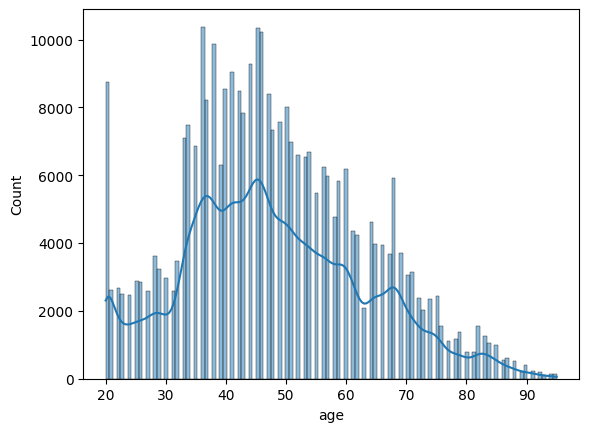

In [ ]:
# distribution des âges
sns.histplot(corr52['age'], kde=True)

In [ ]:
# Test statistique inférentielle - TEST de PEARSON
#
# Ho est 'Le montant des achats n'est pas corrélé à l'âge'
# Ha est 'Le montant des achats est corrélé à l'âge'

stats.pearsonr(corr52['price'], corr52['age'])

PearsonRResult(statistic=-0.327090874403226, pvalue=0.0)

In [ ]:
# Conclusion

print("La p-value étant inférieur à 0,05 on peut rejetter Ho, et donc affirmer que le montant des achats est corrélé à l'âge")

print("")
print("le coefficient de correlation de Pearson est négatif, on a donc une corrélation négative")
print("ce qui confimre la tendance du graphique : plus l'âge est faible plus le montant des achats est élevé")
print(" -0,32 est une force de corrélation moyenne (entre 0,7 et 1 on parle de très forte corrélation)")

La p-value étant inférieur à 0,05 on peut rejetter Ho, et donc affirmer que le montant des achats est corrélé à l'âge

le coefficient de correlation de Pearson est négatif, on a donc une corrélation négative
ce qui confimre la tendance du graphique : plus l'âge est faible plus le montant des achats est élevé
 -0,32 est une force de corrélation moyenne (entre 0,7 et 1 on parle de très forte corrélation)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.3 - Corrélation entre la tranche d'âge et la fréquence d'achat
 </h3>
</div>

In [ ]:
#dataframe pour le graphique
corr53 = df_correl.groupby(['an_semaine','tranche_age'])['id_prod'].count().reset_index()
corr53 = corr53.sort_values("an_semaine", ascending=True)

#création du graphique
fig53 = px.scatter(corr53, x='tranche_age', y='id_prod', title='Corrélation tranche d\'âge et fréquence d\'achat')

fig53.update_layout(
    xaxis_title="Tranche d\'âge des clients",
    yaxis_title='Nombre de livres achetés',
    )

fig53.show()



In [ ]:
# Test statistique inférentielle - TEST de ANOVA
#
# Ho est 'La fréquence d'achat n'est pas corrélée à la tranche d'âge'
# Ha est 'La fréquence d'achat est  corrélée à la tranche d'âge'

# création des différents groupes d'analyse, par tranche d'âge
groupe1 = corr53[corr53.tranche_age == 'Entre 20 et 30 ans']['id_prod']
groupe2 = corr53[corr53.tranche_age == 'Entre 31 et 40 ans']['id_prod']
groupe3 =  corr53[corr53.tranche_age == 'Entre 41 et 50 ans']['id_prod']
groupe4 = corr53[corr53.tranche_age == 'Entre 51 et 60 ans']['id_prod']
groupe5 = corr53[corr53.tranche_age == 'Plus de 60 ans']['id_prod']

# test ANOVA
stats.f_oneway(groupe1, groupe2, groupe3, groupe4, groupe5)



F_onewayResult(statistic=834.4711781228216, pvalue=6.840422978100761e-226)

In [ ]:
# Conclusion
print("La p-value étant inférieur à 0,05 peut rejetter Ho")
print("Au moins une des moyennes diffère, comme il n'y a pas égalité des moyennes et on peut affirmer")
print("que la fréquence d'achat est corrélée à la tranche d'âge")

La p-value étant inférieur à 0,05 peut rejetter Ho
Au moins une des moyennes diffère, comme il n'y a pas égalité des moyennes et on peut affirmer
que la fréquence d'achat est corrélée à la tranche d'âge


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.4 - Corrélation entre l'âge des clients et la taille du panier moyen
 </h3>
</div>

In [ ]:
#dataframe pour le graphique
corr54 = df_correl.groupby(['age'])['price'].mean().reset_index()
corr54 = corr54.sort_values("age", ascending=True)

#création du graphique
fig54 = px.scatter(corr54, x='age', y='price', title='Corrélation entre l\'âge et la taille du panier moyen')

fig53.update_layout(
    xaxis_title="Age du client",
    yaxis_title='Valeur du panier moyen',
    )

fig54.show()

In [ ]:
# Test statistique inférentielle - TEST de PEARSON
#
# Ho est 'Le panier moyen n'est pas corrélé à l'âge'
# Ha est 'Le panier moyen est corrélé à l'âge'

stats.pearsonr(corr54['price'], corr54['age'])

PearsonRResult(statistic=-0.5443989912175686, pvalue=3.7068907776337503e-07)

In [ ]:
# Conclusions

print("La p-value étant inférieur à 0,05 on peut rejetter Ho, et donc affirmer que le montant des achats est corrélé à l'âge")
print("")
print("le coefficient de correlation de Pearson est négatif, on a donc une corrélation négative")
print("ce qui confimre la tendance du graphique : les paniers moyens les plus élévés sont souscrit pas de jeunes acheteurs")
print(" -0,54 est une force de corrélation elevée (entre 0,7 et 1 on parle de corrélation très élevée)")


La p-value étant inférieur à 0,05 on peut rejetter Ho, et donc affirmer que le montant des achats est corrélé à l'âge

le coefficient de correlation de Pearson est négatif, on a donc une corrélation négative
ce qui confimre la tendance du graphique : les paniers moyens les plus élévés sont souscrit pas de jeunes acheteurs
 -0,54 est une force de corrélation elevée (entre 0,7 et 1 on parle de corrélation très élevée)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.5 - Corrélation entre l'âge des clients et la catégorie des livres achetés
 </h3>
</div>

In [ ]:
# Commentaire mentor

In [ ]:
#dataframe pour le graphique
corr55 = df_correl.groupby(['age', 'lib_cat'])['id_prod'].count().reset_index()
corr55 = corr55.sort_values("age", ascending=True)

#création du graphique
fig55 = px.scatter(corr55, x='age', y='id_prod', color='lib_cat', title='Corrélation tranche l\'âge et la catégorie de livre achetée')

fig55.update_layout(
    xaxis_title="Age du client",
    yaxis_title='Nombre de livre achetés',
    legend_title='Catégorie de livre'
    )

fig55.show()

In [ ]:
# Test statistique inférentielle -TEST du KHI2
# Pour tester deux variables catégorielles

# Ho la catégorie de livre achete est indépendate de l'âge
# Ha la catégorie de livre est corrélée à l'âge

# tableau de contigence des données analysées
cont_table = pd.crosstab(df_correl['age'], df_correl['lib_cat']).reset_index()
cont_table.reset_index(inplace=True)
cont_table.columns.name = None
cont_table

index  age  Cat0  Cat1  Cat2
0       0   20  3418  6067  6012
1       1   21   909  1798  1784
2       2   22  1016  1850  1845
3       3   23   974  1676  1728
4       4   24  1114  1744  1671
..    ...  ...   ...   ...   ...
71     71   91   142   193     1
72     72   92   132   178     2
73     73   93    77    91     2
74     74   94    75   161     2
75     75   95    78   123     1

[76 rows x 5 columns]

In [ ]:
# test du Khi2

stats.chi2_contingency(cont_table, correction=True)

Chi2ContingencyResult(statistic=306412.61732033, pvalue=0.0, dof=225, expected_freq=array([[1.05113734e+02, 9.31545809e+03, 5.30631927e+03, 7.90108906e+02],
       [3.05647461e+01, 2.70872894e+03, 1.54296014e+03, 2.29746174e+02],
       [3.20618226e+01, 2.84140382e+03, 1.61853510e+03, 2.40999256e+02],
       [2.98128209e+01, 2.64209132e+03, 1.50500168e+03, 2.24094174e+02],
       [3.08424843e+01, 2.73334283e+03, 1.55698084e+03, 2.31833850e+02],
       [3.51711352e+01, 3.11695936e+03, 1.77549846e+03, 2.64371041e+02],
       [3.39450228e+01, 3.00829803e+03, 1.71360223e+03, 2.55154716e+02],
       [3.30237450e+01, 2.92665194e+03, 1.66709457e+03, 2.48229743e+02],
       [4.21687821e+01, 3.73710940e+03, 2.12875153e+03, 3.16970287e+02],
       [3.95404307e+01, 3.50417793e+03, 1.99606790e+03, 2.97213745e+02],
       [3.60924130e+01, 3.19860545e+03, 1.82200613e+03, 2.71296014e+02],
       [3.20347262e+01, 2.83900247e+03, 1.61716722e+03, 2.40795580e+02],
       [4.05023531e+01, 3.58942604e+03, 

In [ ]:
# Conclusion
print("La pvalue étant inférieur à '0,05', on peut rejetter Ho et affirmer qu'il y a un lien entre l'âge et la catégorie achetée")

La pvalue étant inférieur à '0,05', on peut rejetter Ho et affirmer qu'il y a un lien entre l'âge et la catégorie achetée


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">=======================================================
<br> RESSOURCES <br>=======================================================
</h4>
</div>

Liste des ressources utilisées :

+ https://datatab.fr/tutorial/pearson-correlation
+ https://datatab.fr/tutorial/chi-square-test
+ https://datatab.fr/tutorial/anova
+ https://www.youtube.com/watch?v=JDCmQxX1_pg&list=PLmJWMf9F8euTXMPRdHjSoOlRmTbLz4mAK&index=29

